#  Introduksjon

I denne oppgaven skal vi sammenlikne syklotron og LINAC (lineær akselerator) til medisinsk bruk. Syklotron og LINAC er partikkel akseleratorer som kan bli brukt til kreft behandling, ved å sende en partikkel med nok kinetisk energi til å drepe kreftcellen. Målet med forsøket er å undersøke fordelene og ulempene med å bruke en syklotron og en linak til kreftbehandling. Vi ønsker å se på hvordan hver av maskinene fungerer, hvor mye spenning som skal til for å øke hastigheten nok til for at partikkelene kan ødelegge kreftceller samt hvor mye plass akseleratorene vil bruke. Ved å fokusere strålingen på ett så lite punkt som mulig kan man behandle svulsten uten å ødelegge andre friske celler rundt. Vi vil gjøre dette ved å lage noen forenklede simulasjoner for begge maskinene og teste ulike spenningsverdier for maskinene.

# Syklotron

En syklotron er en partikkelakselerator som bruker elektromagneter til å sende partikler i en sirkelbane for å akselerere dem. Den består av 2 halvsirkler som heter D-plater. Disse platene er separert av en liten avstand hvor E-feltet akselerer partikelen. Det er et konstant magnetfelt som er vinkelrett til partikelens beveglses rettning. Dette magnetfeltet gjør at partikelen holdes i en sirkelbevegelse. Målet med syklotronen er å akselerer partikelen til en hastighet slik at den får en høy nok kinetisk energi til å ødlegge en kreftcelle. For å kunne gjøre det må den kinetiske energien være mellom 100MeV og 250MeV. Dette må vi konvertere om til Joule som er: $$J=eV\cdot 1,6\cdot 10^{-19}$$ løser vi dette får vi en energi på $1.6\cdot 10^{-11} J$. Vi kan finne ut hva hastigheten må være ved å sette opp likningen: $$E_k=\frac{1}{2}mv^2$$ og skriver den om til $$v=\sqrt{\frac{2E_k}{m}}$$Løser vi denne likningen får vi at $v=138.425.708m/s$.Neste trinn er å definere cyclotron-frekvensen, som er frekvensen som bestemmer når det elektriske feltet bør skifte for å gi maksimal hastighet til partikkelen. Forutsatt at avstanden mellom D-ene er liten, kan vi finne dette ved å sette den magnetiske kraften lik uttrykket for sirkulær bevegelse:

$$F=qvB=\frac{Mv^2}{r}$$
$$r=\frac{mv}{qB}$$
Setter vi dette inn i likningen for tiden til en full rotasjon får vi:
$$T=\frac{2 \pi r}{v} = \frac{2\pi m}{qB}$$
Gjør vi dette om til vinkel frekvensen får vi:
$$\omega_{cyclotron} = \frac{qB}{m}$$

Regner vi ut radiusen får vi:
$$r=\frac{mv}{qB}=\frac{1.67e-27\cdot 138.425.708}{1.6e-19 \cdot 1,5}= 0,9632 m$$
Vi setter radiusen til å være 1m i koden slik at vi har litt margin.

<div>
    <img src="attachment:e761df7f-fd3b-417c-9136-d734ea8b2722.png" width="500"/>
</div> 

På bildet kan du se hvordan magnetfeltet er vinkelrett på partikens akselerasjonsrettning, og hvordan det elektriske feltet blir sendt mellom D-platene. Partikelen blir plassert i midten av syklotronen og blir akslerert utover ved hjelp av E-feltet og sentriputalkraften som magnetfeltet skaper. Ser på bildet at elektronet går utover når partikkelen akselererer og til slutt blir skutt ut av syklotronet.

4796426.70469283


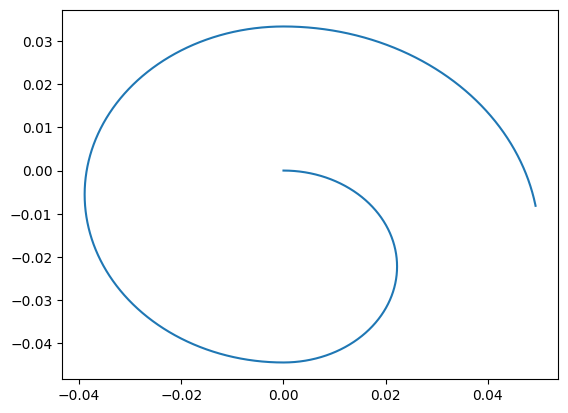

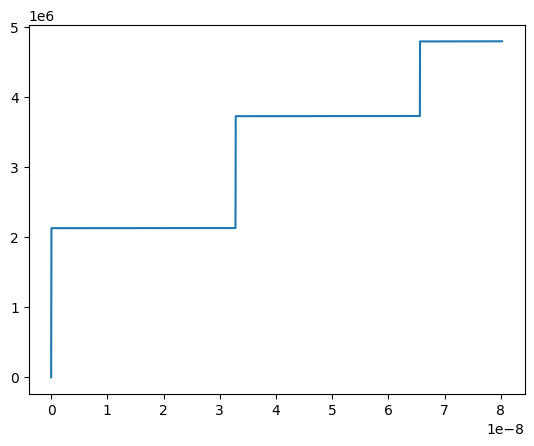

In [15]:
import numpy as np
import matplotlib.pyplot as plt


q = 1.6e-19 #ladning til proton
m = 1.67e-27 # masse til proton
V = 50000 #spennning mellom platene, det er denne vi vil å finne
d = 90e-6 #avstanden mellom platene i akseleratoren
c = 299792458 #lysets hastighet

def E(voltage):
    return(voltage/d)

B = np.array([0.0, 0.0, 1]) #magnetisk felt i z retning, 1.5T. Skal jeg forandre på denne?
r_cyclotron = 0.05 #radius på 5 cm


w = q*np.linalg.norm(B)/m

t = 0 #start tid
dt = 5e-12 #tidssteg, kan være vi må øke denne til 5 pico sekund.
max_velocity = 138519832

def cyclotron(E):
    particle_pos = np.array([0.0, 0.0, 0.0]) #posisjon til protonet i utgangspunktet
    particle_v = np.array([0.0, 0.0, 0.0]) #start hastigheter
    vel_list = []
    particle_pos_x = [particle_pos[0]]
    particle_pos_y = [particle_pos[1]]
    t = 0
#
    while (np.linalg.norm(particle_pos) < r_cyclotron) :#and np.linalg.norm(particle_v) < max_velocity:#loop så lenge protonet er inne i akseleratoren

        Fnet = np.array([0.0, 0.0, 0.0]) #kraftvektor på partikkelen her

        if np.absolute(particle_pos[0]) < d/2: #hvis partikkelen er mellom de to D - ene beregner vi den elektriske kraften
            Fnet[0] = q*E*np.cos(w*t)
            Fnet += q*np.cross(particle_v, B)
        else: #hvis partikkelen ikke er innen for det elektriske feltet virker bare den magnetiske kraften
            Fnet = q*np.cross(particle_v, B)

        vel_list.append(np.linalg.norm(particle_v))
        particle_v = particle_v + Fnet*dt/m #oppdaterer hastigheten
        particle_pos = particle_pos + particle_v*dt #bruker hastighet til å oppdatere posisjon.
        particle_pos_x = np.append(particle_pos_x, particle_pos[0])
        particle_pos_y = np.append(particle_pos_y, particle_pos[1])
        t = t + dt
        if np.linalg.norm(particle_v) >= c:
            break
    return particle_pos_x, particle_pos_y, particle_v, np.linalg.norm(particle_v), vel_list, t

pos_x, pos_y, _, v, vel_list, t = cyclotron(E(V))
print(v)

t = np.linspace(0, t, len(vel_list))
plt.plot(pos_x, pos_y)
plt.show()
plt.plot(t, vel_list)

Plottet over likner bevegelsen til en partikkel i et syklotron og at hastigheten øker når partikkelen er mellom platene. Brukte her vilkåerlige verdier for å se om simulasjonen fungerer. 

# Lineær akselerator

En lineær akselerator akselerer partikelen lineært. Den har et vacumkammer hvor partikelen blir sendt gjennom. Inne i akseleratoren er det en rekke rør eller hulrom, vanligvis laget av metall. Disse rørene er underlagt vekslende elektriske felt som endrer retning med høy frekvens. Det er viktig at disse elektriske feltene endrer polaritet med riktig timing for å oppnå akselerasjon. Partiklene som injiseres, beveger seg gjennom rørene mens de er påvirket av de vekslende elektriske feltene. For å akselerere partiklene, må akseleratoren være riktig faseladet. Dette betyr at partiklene må "fange opp" eller "fase" med de elektriske feltene slik at de får en akselererende kraft i riktig retning. Dette oppnås ved å kontrollere timingen av de elektriske feltene. Partiklene blir akselerert gradvis etter hvert som de beveger seg gjennom akseleratoren. Hver seksjon av akseleratoren gir en liten økning i partiklenes hastighet. Vanligvis i kreftbehandling blir det brukt elektron, men for enkelhetens skyld bruker vi et proton slik at det blir lettere å sammenlikne syklotron og LINAC. Man sender enten elektronene direkte, eller så treffer elektronet en tungmetallmål som gjør energien til elektronet om til røntgenstråler.

Text(0.5, 1.0, 'Kinetisk energi til en partikkel i en linak')

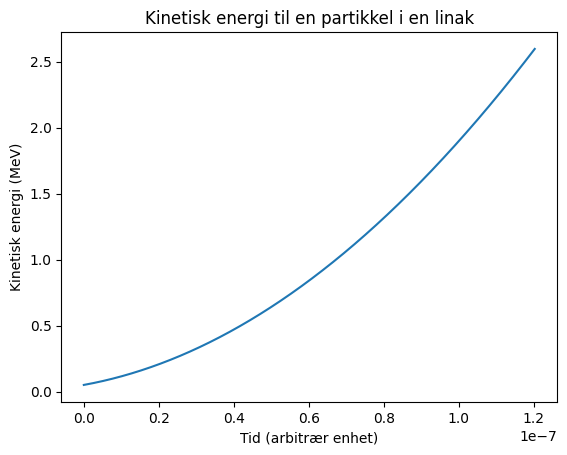

In [16]:
# Konstanter
q = 1.6e-19  # Ladning til proton (Coulomb)
m = 1.67e-27  # Masse til proton (kg)

# Parametere for linak
V = 50000  # Spenningsforskjell i hvert hulrom (Volt)
d = 0.03  # Lengden av hvert hulrom (m)
n_hulrom = 50  # Antall hulrom

def linak_simulasjon(V, d, n_hulrom):
    # Initialbetingelser
    particle_pos = 0.0  # Startposisjon
    particle_v = 0.0  # Starthastighet (vi gir den en liten initial hastighet senere)
    particle_energy = []

    # Tidsparametere
    dt = 1e-11  # Tidssteg (s)
    t = 0
    # Simulerer akselerasjon i linak
    for hulrom in range(n_hulrom):
        # Vi antar at partikkelen får en initial hastighet i det første hulrommet
        if hulrom == 0:
            particle_v = np.sqrt(2 * q * V / m)

        # Beregner tiden det tar å passere gjennom et hulrom
        t_hulrom = d / particle_v
        n_steps = int(t_hulrom / dt)

        for step in range(n_steps):
            # Akselerasjon i hvert hulrom
            particle_v += q * V / m * dt / d
            # Oppdaterer posisjon
            particle_pos += particle_v * dt
            # Beregner og lagrer kinetisk energi
            kinetic_energy = 0.5 * m * particle_v**2/(q * 1e6)
            particle_energy.append(kinetic_energy)
            t += dt

            # Stopper simuleringen hvis partikkelen når opp til nær lysets hastighet
            if particle_v >=  c:
                break

        # Stopper hele simuleringen hvis partikkelen når opp til nær lysets hastighet
        if particle_v >= c:
            break

    return particle_energy, particle_v, t

# Kjører simuleringen
particle_energy, particle_v, t = linak_simulasjon(V, d, n_hulrom)
# Plotter resultatene
t = np.linspace(0, t, len(particle_energy))
plt.plot(t, particle_energy)
plt.xlabel('Tid (arbitrær enhet)')
plt.ylabel('Kinetisk energi (MeV)')
plt.title('Kinetisk energi til en partikkel i en linak')

Energien øker ikke konstant, men gradvis mer og mer, som den skal. Brukte også vilkåerlige verdier her også for å teste at simulasjonen fungerer. Plotter ikke posisjonene til partikkelen, siden den bare beveger seg i en retning er det ikke like interessant å se. 

# Resultat



In [17]:
r_cyclotron = 1
d = 0.02
dt = 5e-10
B = np.array([0,0,2])
w = q*np.linalg.norm(B)/m


def voltage_test_cyclotron(target_ke_MeV):
    voltage = np.linspace(1e6, 1e7, 10000)  # Spenningsintervall vi ser på
    for V in voltage:
        pos_x, pos_y, _, v, vel_list, t = cyclotron(E(V))
        # Sjekker den siste verdien av kinetisk energi i listen
        ke_MeV = 0.5 * m * v**2/(q * 1e6)
        if abs(ke_MeV - target_ke_MeV) < 1:  # Finner den spenningen som gir nærmest treff
            return V, ke_MeV, pos_x, pos_y, vel_list, t
    return None, None, None, None, None

pos_x, pos_y, _, v, vel_list, t = cyclotron(E(V))



# V, E_0, pos_x, pos_y, vel_list, t = voltage_test_cyclotron(100)
# t = np.linspace(0, t, len(vel_list)) 
# if V is not None:
#     print(f"Suitable voltage: {V} V")
#     print(f"Proton energy: {E_0} MeV")
#     print(f"Position shot out: {np.linalg.norm([pos_x[-1], pos_y[-1]])}")
#     print(f"Tid partikken blir skutt ut {t[-1]}")
#     plt.figure(figsize=(12, 12))
#     plt.plot(pos_x, pos_y)
#     plt.show()
#     plt.plot(t, vel_list)
#     plt.xlabel('Tid (s)')
#     plt.ylabel('Hastighet (m/s)')
# else:
#     print("No suitable voltage fount within the given range")


Ser fra det første plottet at partikkelet beveger seg utover slik det skal. Ser her at den første spenningsverdien alltid er spenning. Det andre plotter viser hastigheten som funksjon av tid. Ser også at posisjonen partikkelen når 100 MeV er ca 0.97m og at den blir skutt ut etter $5\cdot 10^{-7}$ s

Suitable voltage: 447029.702970297 V
Proton energy: 12.001786145085307 MeV


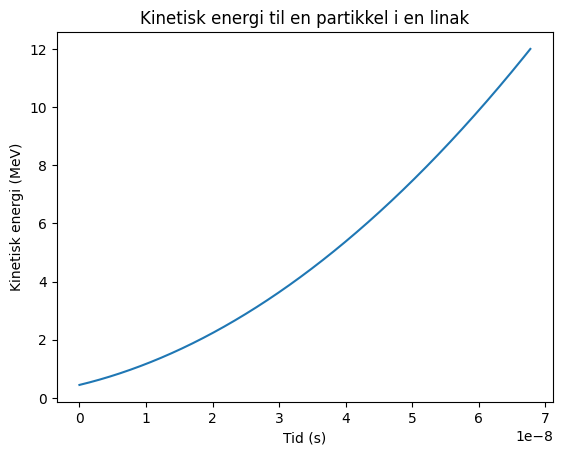

In [ ]:
###### Mål for kinetisk energi i MeV
target_ke_MeV = 13  # 100 MeV
d = 0.075  # Lengden av hvert hulrom (m)
n_hulrom = 25  # Antall hulrom


def voltage_test_linak(target_ke_MeV, d, n_hulrom):
    voltage = np.linspace(1e4, 1e6, 10000)  # Spenningsintervall vi ser på
    for V in voltage:
        particle_energy, _, t = linak_simulasjon(V, d, n_hulrom)
        # Sjekker den siste verdien av kinetisk energi i listen
        if particle_energy:
            ke_MeV = particle_energy[-1]
            if abs(ke_MeV - target_ke_MeV) < 1:  # Finner den spenningen som gir nærmest treff
                return V, ke_MeV, particle_energy, t
    print("No suitable voltage found within the given range.")
    return None, None, None, None


V, E_0, particle_energy, t = voltage_test_linak(target_ke_MeV, d, n_hulrom)
t = np.linspace(0, t, len(particle_energy))
if V is not None:
    print(f"Suitable voltage: {V} V")
    print(f"Proton energy: {E_0} MeV")
    plt.plot(t, particle_energy)
    plt.xlabel('Tid (s)')
    plt.ylabel('Kinetisk energi (MeV)')
    plt.title('Kinetisk energi til en partikkel i en linak')

# Feilkilder og forenklinger
Simulasjonene våre er ganske forenklet i forhold til hvordan akseleratorene fungerer i virkeligheten. Syklotronet blir påvirket sterkt av relativistiske effekter, dette ser vi borifra i simulasjonen og utregningene våre. Dette kan påvirke resultatet vårt siden hastigheten til partikkelen når den skytes ut er rundt $46\% $ av lysets hastightet. 

En til feilkilde kan være noen av verdiene vi har valgt. Det var litt vanskelig å finne vanlige verdier brukt i medisinske akseleratorer. Mange av de valgte verdiene kommer fra chatGPT og kan dermed være feil. 

Simulasjonene og testene kan også være feil ettersom koden kan være feil. Vi fikk koden til å simulere en syklotron, men måtte skrive en ny kode for linak-en. Det kan godt hende at denne er skrevet feil eller ikke fungerer som ønsket. Det kan også hende at testene vi bruker ikke tester slik vi vil.

# Analyse
Fra resultatet fant vi ut at spenningen i syklotronen ikke har så mye å si Dette er fordi den totale spenningen en partikkel trenger for å nå 100 MeV er 100 MV. Spenningen påvirker antall runder til partikkelen i syklotronet. Det kan bli utledet slik:
$$100 MeV = n \cdot q \cdot \Delta V $$
Hvor n er antall ganger partikkelen blir akseslerert av det elektrikse feltet, $\Delta V$ er spenningen i det elektriske feltet, og q er ladningen til partikkelen. Vi fant ut at utregningen vår for radiusen stemte ganske godt med når partikkelen når en kinetisk energi på 100 MeV. 

Når det gjelder linak-en trenger den en spenning på 449029 V, dette er en ganske høy spenning å ha i hvert hulrom. Men her vil også en lik likning fungere:
$$13 MeV = n \cdot q \cdot \Delta V$$
Men her er n antall hulrom, og $\Delta V$ er spenningen i hulrommene. Så her vil man også kunne få ned spenningen hvis man legger til flere hulrom. 

Hvis man ser på hvilken av akseleratorene som trenger mindre spenning er det åpenbart at linak-en trenger en mindre total spenning, men den vil generelt trenge en mye større spenning i hver av hulrommene enn, syklotronen vil trenge mellom d-platene. Det vil også være enklere å øke energien i en linak siden antall hulrom ikke endrer seg med spenningen. Energien til linak-en vil dermed være proporsjonal med spenningen. I en syklotron vil n endre seg med spenningen, og man må derfor endre radiusen til syklotronen hvis man vil ha et høyere eller lavere energinivå på utgangen. 

# Konklusjon
Alt i alt er vi ganske fornøyd med hvordan forsøkene har gått. 